# Graded lab session 5 | Deep classification on Fashion-MNIST using pytorch

pierre-henri.conze@imt-atlantique.fr \\
francois.rousseau@imt-atlantique.fr \\
aurelien.colin@imt-atlantique.fr \\
simon.benaichouche@imt-atlantique.fr

---



#### **Student name** = Luther Ollier - Stanislas de Charentenay

### Objective of this lab session: perform classification on Fashion-MNIST using multi-layer perceptron, convolutional neural networks and transfer learning to obtain the best classification results as possible.

#### Challenge: the first 3 students in terms of overall test accuracy results (whatever the methodology used) will obtain bonus points!

### Table of Contents

* [Data management](#section_1)
    * [Question 1.1](#question_1_1)
    * [Question 1.2](#question_1_2)
    * [Question 1.3](#question_1_3)
    * [Question 1.4](#question_1_4)
* [Multi-Layer Perceptron](#section_2)    
    * [Question 2.1](#question_2_1)
    * [Question 2.2](#question_2_2)
    * [Question 2.3](#question_2_3)
    * [Question 2.4](#question_2_4)
    * [Question 2.5](#question_2_5)
* [Convolutional neural network](#section_3)    
    * [Question 3.1](#question_3_1)
    * [Question 3.2](#question_3_2)
    * [Question 3.3](#question_3_3)
    * [Question 3.4](#question_3_4)
    * [Question 3.5](#question_3_5)
    * [Question 3.6](#question_3_6)
    * [Question 3.7](#question_3_7)
* [Transfer learning from ImageNet](#section_4)    
    * [Question 4.1](#question_4_1)
    * [Question 4.2](#question_4_2)
    * [Question 4.3](#question_4_3)
    * [Question 4.4](#question_4_4)
    * [Question 4.5](#question_4_5)
* [Challenge](#section_5)    
    * [Question 5.1](#question_5_1)

## 1- Data management <a class="anchor" id="section_1"></a>

Start with these lines of code to automatically download the Fashion-MNIST dataset.

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### **Question 1.1** - Fashion-MNIST is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D? <a class="anchor" id="question_1_1"></a>

In [ ]:
print(" A : {} \n B : {} \n C : {} \n D : {}".format(len(train_data), len(test_data), train_data[0][0].shape[1], len(set(test_data.targets.numpy()))) )



 A : 60000 
 B : 10000 
 C : 28 
 D : 10


As indicated below, each Fashion-MNIST sample is assigned to one of the following classes: 0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot.

In [ ]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### **Question 1.2** - Complete the following cell to create data loaders ([documentation](https://pytorch.org/docs/stable/data.html)) for training, validation and test sets. <a class="anchor" id="question_1_2"></a>

In [ ]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

batch_size = 20
valid_size = 0.2

def create_data_loaders(batch_size, valid_size, train_data, test_data): 

  indices = list(range(len(train_data)))
  np.random.shuffle(indices)
  split = int(np.floor(valid_size * len(train_data)))
  train_index, valid_index = indices[split:], indices[:split]

  train_sampler = SubsetRandomSampler(train_index)
  valid_sampler = SubsetRandomSampler(valid_index)

  train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = train_sampler)
  valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = valid_sampler)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

    
  return train_loader, valid_loader, test_loader

In [ ]:
train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, train_data, test_data) 

#### **Question 1.3** - Visualize some images from the training set with corresponding ground truth labels. <a class="anchor" id="question_1_3"></a>

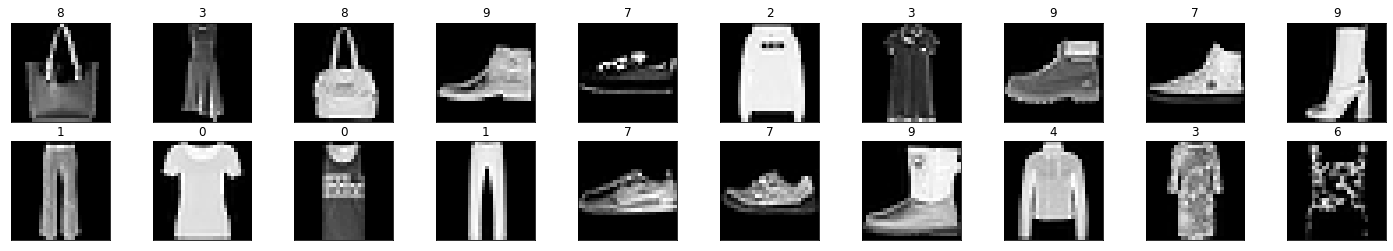

In [ ]:
# CELL TO BE COMPLETED
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_iter = iter(train_loader) 
images, labels = data_iter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray') 
    ax.set_title(str(labels[idx].item()))

#### **Question 1.4** - View one of these images with more details by superimposing the greyscale intensity values directly on it. <a class="anchor" id="question_1_4"></a>

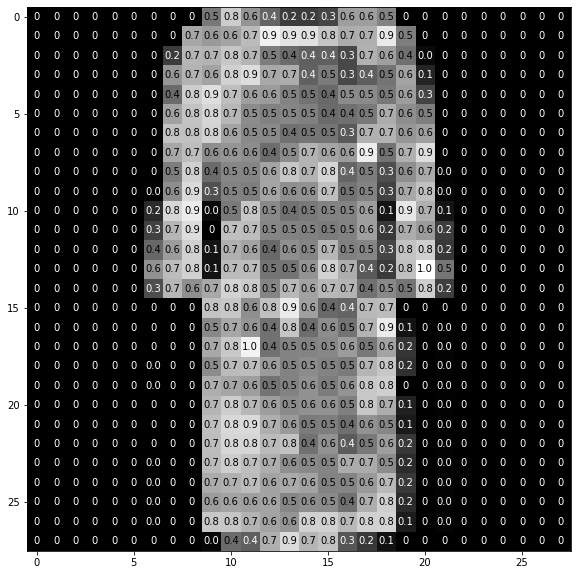

In [ ]:
img = np.squeeze(images[18])
fig= plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width, height = img.shape
tresh=img.max()/2.5

for x in range(width):
  for y in range(height):
    val=round(img[x][y], 1) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white' if img[x][y]<tresh else 'black')




## 2- Multi-Layer Perceptron (MLP) <a class="anchor" id="section_2"></a>

First, let us use a multi-layer perceptron (MLP) to automatically classify Fashion-MNIST images.

#### **Question 2.1** - Define a MPL architecture with (at least) 2 fully-connected as well as dropout layers. <a class="anchor" id="question_2_1"></a>

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module): 
    def __init__(self, in_features, out_features, n_hidden): 
      super(MLP,self).__init__()
      self.in_features=in_features
      self.Block1=nn.Sequential(nn.Linear(in_features, n_hidden),
                                nn.Dropout())
      self.Block2=nn.Sequential(nn.Linear(n_hidden, n_hidden),
                                nn.Dropout())
      self.Block3=nn.Linear(n_hidden, out_features)

    def forward(self,x): 
      x=x.view(-1,self.in_features)
      x=F.relu(self.Block1(x))
      x=F.relu(self.Block2(x))
      x=F.softmax(self.Block3(x))
      
      return x

#### **Question 2.2** - Train the pre-defined MPL network with cross entropy as loss function and stochastic gradient descent as optimization algorithm. <a class="anchor" id="question_2_2"></a>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device '+str(device))

Using device cuda


In [ ]:
model_1 = MLP(28**2,10,512)
model_1.to(device=device)

MLP(
  (Block1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Dropout(p=0.5, inplace=False)
  )
  (Block2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): Dropout(p=0.5, inplace=False)
  )
  (Block3): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
#DEFINE THE CRITERION
criterion = nn.CrossEntropyLoss()

In [ ]:
#DEFINE THE OPTIMIZER
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.01)

In [ ]:
n_epochs = 30

def training(n_epochs, train_loader, valid_loader, model, criterion, optimizer):

  train_losses, valid_losses = [], []
  valid_loss_min = np.Inf

  for epoch in range(n_epochs):
      train_loss, valid_loss = 0, 0
      model.train()

      for data, label in train_loader:
          data = data.to(device=device, dtype=torch.float32)
          label = label.to(device=device, dtype=torch.long)

          optimizer.zero_grad()
          output=model(data)
          loss = criterion(output, label)
          loss.backward()
          optimizer.step()
          train_loss+=loss.item()*data.size(0)
          
      model.eval()
      for data, label in valid_loader:
          data = data.to(device=device, dtype=torch.float32)
          label = label.to(device=device, dtype=torch.long)

          with torch.no_grad(): 
            output=model(data)

          loss = criterion(output, label)
          valid_loss+=loss.item()*data.size(0)
            
      train_loss /= len(train_loader.sampler)
      valid_loss /= len(valid_loader.sampler)
      train_losses.append(train_loss)
      valid_losses.append(valid_loss)
      
      print('epoch: {} \ttraining Loss: {:.6f} \tvalidation Loss: {:.6f}'.format(epoch+1, train_loss, valid_loss))

      if valid_loss <= valid_loss_min:
          print('validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          valid_loss))
          torch.save(model.state_dict(), 'model.pt')
          valid_loss_min = valid_loss
      
  return train_losses, valid_losses      

In [ ]:
#RUN THE TRAINING FUNCTION
train_losses_1, valid_losses_1 = training(n_epochs, train_loader, valid_loader, model_1, criterion, optimizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch: 1 	training Loss: 2.260081 	validation Loss: 2.128460
validation loss decreased (inf --> 2.128460).  Saving model ...
epoch: 2 	training Loss: 1.979688 	validation Loss: 1.838715
validation loss decreased (2.128460 --> 1.838715).  Saving model ...
epoch: 3 	training Loss: 1.828635 	validation Loss: 1.779617
validation loss decreased (1.838715 --> 1.779617).  Saving model ...
epoch: 4 	training Loss: 1.778438 	validation Loss: 1.740539
validation loss decreased (1.779617 --> 1.740539).  Saving model ...
epoch: 5 	training Loss: 1.742354 	validation Loss: 1.714272
validation loss decreased (1.740539 --> 1.714272).  Saving model ...
epoch: 6 	training Loss: 1.717766 	validation Loss: 1.697570
validation loss decreased (1.714272 --> 1.697570).  Saving model ...
epoch: 7 	training Loss: 1.704135 	validation Loss: 1.689104
validation loss decreased (1.697570 --> 1.689104).  Saving model ...
epoch: 8 	training Loss: 1.695744 	validation Loss: 1.683268
validation loss decreased (1.68910

#### **Question 2.3** - Plot the evolution of the loss function for both training and validation sets with respect to epochs to study the convergence of the training process. <a class="anchor" id="question_2_3"></a>

Text(0, 0.5, 'loss value')

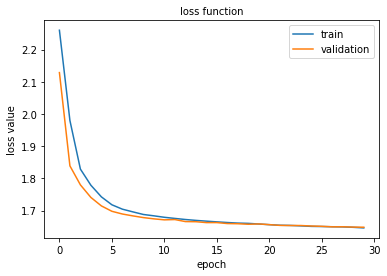

In [ ]:
plt.plot(range(n_epochs), train_losses_1)
plt.plot(range(n_epochs), valid_losses_1)
plt.legend(['train', 'validation'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.ylabel('loss value', size=10)

Let us load the model corresponding to the lowest validation loss.

In [ ]:
model_1.load_state_dict(torch.load('model.pt', map_location=device))

<All keys matched successfully>

#### **Question 2.4** - Test the best model on (unseen) test data and evaluate it’s performance in terms of overall and per-class accuracy scores. <a class="anchor" id="question_2_4"></a>

In [ ]:
def evaluation(model, test_loader, criterion): 

  test_loss = 0.0
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))

  model.eval()
  for data, label in test_loader:
      data = data.to(device=device, dtype=torch.float32)
      label = label.to(device=device, dtype=torch.long)
      with torch.no_grad():
          output = model(data)
      loss = criterion(output, label)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)
      correct = np.squeeze(pred.eq(label.data.view_as(pred)))
      for i in range(len(label)):
          digit = label.data[i]
          class_correct[digit] += correct[i].item()
          class_total[digit] += 1

  test_loss = test_loss/len(test_loader.sampler)
  print('test Loss: {:.6f}\n'.format(test_loss))
  for i in range(10):
      print('test accuracy of %s: %2d%% (%2d/%2d)' % (class_names[i], 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
  print('\ntest accuracy (overall): %2.2f%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

In [ ]:
#RUN THE EVALUATION FUNCTION
evaluation(model_1, test_loader, criterion) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


test Loss: 1.650454

test accuracy of T-shirt/top: 90% (909/1000)
test accuracy of Trouser: 94% (945/1000)
test accuracy of Pullover: 81% (814/1000)
test accuracy of Dress: 86% (863/1000)
test accuracy of Coat: 83% (835/1000)
test accuracy of Sandal: 91% (917/1000)
test accuracy of Shirt:  0% ( 0/1000)
test accuracy of Sneaker: 93% (935/1000)
test accuracy of Bag: 96% (964/1000)
test accuracy of Ankle boot: 94% (945/1000)

test accuracy (overall): 81.27% (8127/10000)


#### **Question 2.5** - Visualize some incorrect predictions by displaying test images and labels in the format: "predicted (ground-truth)". <a class="anchor" id="question_2_5"></a>

In [ ]:
def get_all_prediction(model, loader): 
    preds = torch.tensor([], dtype=torch.long)
    targets = torch.tensor([], dtype=torch.long)
    for data, label in loader:
        data = data.to(device=device, dtype=torch.float32)
        label = label.to(device=device, dtype=torch.long)
        with torch.no_grad():
            output = model(data)
        targets = torch.cat((targets, label.cpu()), dim = 0)
        preds = torch.cat((preds, torch.max(output.cpu(), 1)[1]), dim = 0)
    return targets.numpy(), preds.numpy()

In [ ]:
#RUN THE GET_ALL_PREDICTION FUNCTION
targets, preds_1 =  get_all_prediction(model_1, test_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


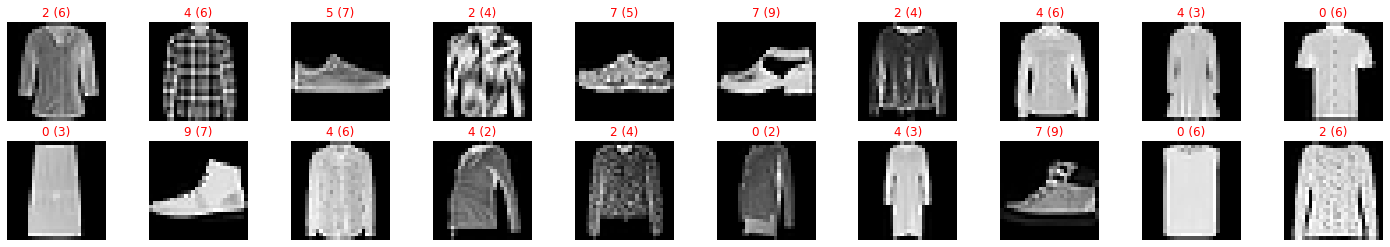

In [ ]:
index = np.where(preds_1 - targets != 0)[0]
test_set_array = test_data.data.numpy()
plt.figure(figsize=(25, 4))
for i in range(20):
  plt.subplot(2, 10, i + 1)
  plt.axis('off')
  plt.imshow(test_set_array[index[i],:,:], cmap='gray')
  plt.title("{} ({})".format(str(np.int(preds_1[index[i]])), str(np.int(targets[index[i]]))),color=("red"))
plt.show()

## 3- Convolutional neural network (CNN) <a class="anchor" id="section_3"></a>

Let us now switch from MLP to convolutional neural network (CNN) to classify Fashion-MNIST images.

#### **Question 3.1** - Define a CNN architecture using (at least) 2 patterns [CONV - CONV - POOL] as well as dropout and fully-connected layers. <a class="anchor" id="question_3_1"></a>

<br/>
On s'est inspiré de l'architecure LeNet-5 de Yann Lecun pour créer le modèle.

In [ ]:
class CNN(nn.Module):

    def __init__(self): # FUNCTION TO BE COMPLETED
        super(CNN,self).__init__()
np.stack((img,)*3, axis=-1)annels=16,
                                            kernel_size=5,
                                            stride=1),
                                  nn.Tanh(),
                                  nn.AvgPool2d(kernel_size=2),
                                  nn.Conv2d(in_channels=16,
                                            out_channels=120,
                                            kernel_size=5,
                                            stride=1),
                                  nn.Tanh())
        self.Dropout=nn.Dropout(0.2)
        self.Block2 = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self,x): # FUNCTION TO BE COMPLETED

        x = self.Block1(x)
        x = self.Dropout(torch.flatten(x, 1))
        x = self.Block2(x)
        x = F.softmax(x, dim=1)

        return x

#### **Question 3.2** - Describe input/output sizes of each layer using summary() from torchsummary. <a class="anchor" id="question_3_2"></a>

In [ ]:
from torchsummary import summary

model_2 = CNN()
model_2.to(device=device)


CNN(
  (Block1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (Dropout): Dropout(p=0.2, inplace=False)
  (Block2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

#### **Question 3.3** - Train the pre-defined CNN network with cross entropy as loss function and stochastic gradient descent as optimization algorithm. <a class="anchor" id="question_3_3"></a>

In [ ]:
#DEFINE THE OPTIMIZER
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

In [ ]:
#RUN THE TRAINING FUNCTION
train_losses_2, valid_losses_2 = training(n_epochs, train_loader, valid_loader, model_2, criterion, optimizer)

epoch: 1 	training Loss: 1.719285 	validation Loss: 1.658621
validation loss decreased (inf --> 1.658621).  Saving model ...
epoch: 2 	training Loss: 1.641681 	validation Loss: 1.629735
validation loss decreased (1.658621 --> 1.629735).  Saving model ...
epoch: 3 	training Loss: 1.624673 	validation Loss: 1.624595
validation loss decreased (1.629735 --> 1.624595).  Saving model ...
epoch: 4 	training Loss: 1.614501 	validation Loss: 1.609810
validation loss decreased (1.624595 --> 1.609810).  Saving model ...
epoch: 5 	training Loss: 1.609070 	validation Loss: 1.609546
validation loss decreased (1.609810 --> 1.609546).  Saving model ...
epoch: 6 	training Loss: 1.603598 	validation Loss: 1.604272
validation loss decreased (1.609546 --> 1.604272).  Saving model ...
epoch: 7 	training Loss: 1.598214 	validation Loss: 1.601144
validation loss decreased (1.604272 --> 1.601144).  Saving model ...
epoch: 8 	training Loss: 1.595631 	validation Loss: 1.606464
epoch: 9 	training Loss: 1.593224 

#### **Question 3.4** - Display in a single graph the loss functions for training and validation sets obtained with both MLP and CNN models. <a class="anchor" id="question_3_4"></a>

Text(0, 0.5, 'loss value')

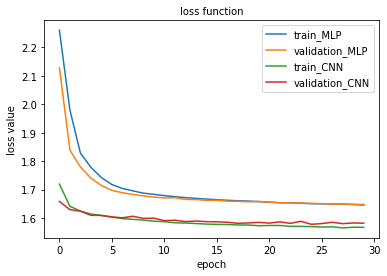

In [ ]:
plt.plot(range(n_epochs), train_losses_1)
plt.plot(range(n_epochs), valid_losses_1)
plt.plot(range(n_epochs), train_losses_2)
plt.plot(range(n_epochs), valid_losses_2)
plt.legend(['train_MLP', 'validation_MLP', 'train_CNN', 'validation_CNN'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.ylabel('loss value', size=10)


As previously, we load the model corresponding to the lowest validation loss.

In [ ]:
model_2.load_state_dict(torch.load('model.pt', map_location=device))

<All keys matched successfully>

#### **Question 3.5** - Test the model on test data and evaluate it through overall and per-class accuracy scores. Compare these scores with the ones obtained using MLP. <a class="anchor" id="question_3_5"></a>

In [ ]:
#RUN THE EVALUATION FUNCTION
evaluation(model_2,test_loader, criterion) 

test Loss: 1.583821

test accuracy of T-shirt/top: 86% (868/1000)
test accuracy of Trouser: 96% (961/1000)
test accuracy of Pullover: 84% (844/1000)
test accuracy of Dress: 90% (904/1000)
test accuracy of Coat: 77% (779/1000)
test accuracy of Sandal: 95% (958/1000)
test accuracy of Shirt: 58% (585/1000)
test accuracy of Sneaker: 97% (971/1000)
test accuracy of Bag: 97% (971/1000)
test accuracy of Ankle boot: 93% (937/1000)

test accuracy (overall): 87.78% (8778/10000)


#### **Question 3.6** - Display CNN results for images whose prediction was incorrect with MLP. Labels should be indicated in the following format: "CNN label (ground-truth)" in red if wrong, green otherwise. <a class="anchor" id="question_3_6"></a>

In [ ]:
#RUN THE GET_ALL_PREDICTION FUNCTION
targets, preds_2 = get_all_prediction(model_2, test_loader)

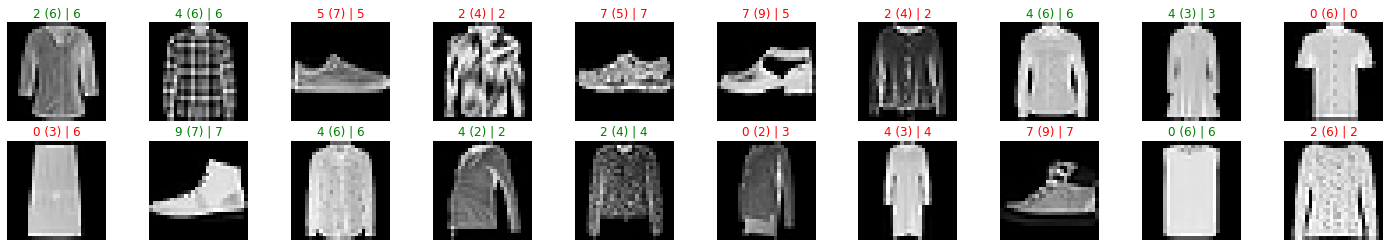

In [ ]:
plt.figure(figsize=(25, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.imshow(test_set_array[index[i],:,:], cmap='gray')
    plt.title("{} ({}) | {}".format(str(np.int(preds_1[index[i]])), str(np.int(targets[index[i]])), str(np.int(preds_2[index[i]]))), color=("green" if preds_2[index[i]]==targets[index[i]] else "red"))
plt.show()





#### **Question 3.7** - Display the confusion matrix for both MLP and CNN models. <a class="anchor" id="question_3_7"></a>

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

normalized confusion matrix
normalized confusion matrix


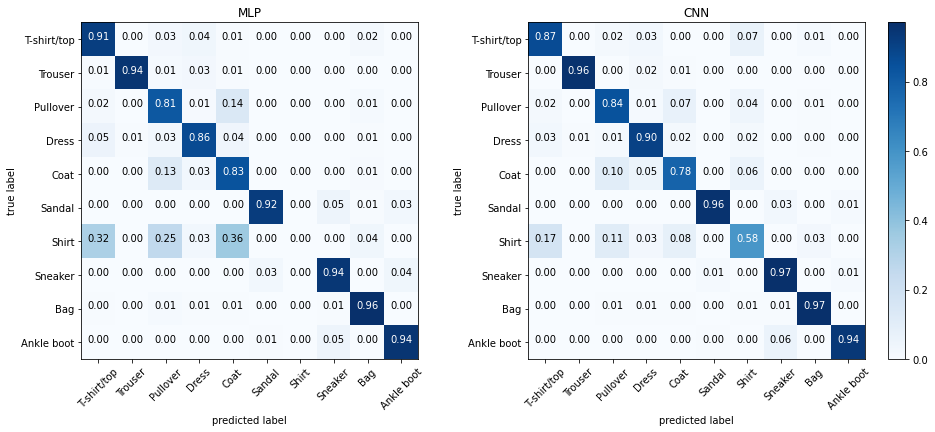

In [ ]:
# compute confusion matrix
cnf_matrix_MLP = confusion_matrix(targets, preds_1)
cnf_matrix_CNN = confusion_matrix(targets, preds_2)
np.set_printoptions(precision=2)

# plot normalized confusion matrixes
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix_MLP, classes=class_names, normalize=True, title='MLP')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix_CNN, classes=class_names, normalize=True, title='CNN')
plt.show()

## 4- Transfer learning from ImageNet <a class="anchor" id="section_4"></a>

Transfer learning focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

Our goal is to use a (well-known) CNN architecture whose weights have been already trained on ImageNet to perform transfer learning and fine tuning. ImageNet is a large visual database designed for visual object recognition purposes wich contains more than 14 million images!

#### **Question 4.1** - Modify the Fashion-MNIST dataset to make it fit to  ImageNet by extending Fashion-MNIST images from greyscale to 3-channels images. Since the minimal image dimension as inputs of pre-trained CNN models is 48x48, you will also need to resize images. To do so, use transform.Compose(), transforms.Resize() and transforms.Grayscale(). More details on image transformations are available in the [documentation](https://pytorch.org/docs/stable/torchvision/transforms.html). <a class="anchor" id="question_4_1"></a>

In [ ]:
#CALL transforms.Compose to adapt the dataset to the VGG16 architecture
transform =  transforms.Compose([
                                 transforms.Grayscale(num_output_channels=3), 
                                 transforms.Resize((48,48)),
                                 transforms.ToTensor()])

train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = transform)

In [ ]:
print(train_data[0][0].shape)

torch.Size([3, 48, 48])


#### **Question 4.2** - Create training, validation and test data loaders. Check the dimensions of images arising from the modified Fasion-MNIST dataset. <a class="anchor" id="question_4_2"></a>

In [ ]:
# CELL TO BE COMPLETED
train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, train_data, test_data)
data_iter = iter(train_loader)
images, labels = data_iter.next()
print(images.numpy().shape)

(20, 3, 48, 48)


#### **Question 4.3** - Exploit a vgg16 architecture ([related paper](https://arxiv.org/pdf/1409.1556.pdf)) pre-trained on ImageNet to improve the classification scores on Fashion-MNIST through fine-tuning. See the [documentation](https://pytorch.org/docs/stable/torchvision/models.html) for further details. Use summary() from torchsummary to describe each of the vgg16 layers. To avoid a too long learning time, you may use only 5 epochs during fine-tuning. <a class="anchor" id="question_4_3"></a>

In [ ]:
import torchvision.models as models

model_3 = models.vgg16_bn(pretrained=True)
model_3.to(device=device)
summary(model_3, (3, 48, 48))

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           1,792
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
            Conv2d-4           [-1, 64, 48, 48]          36,928
       BatchNorm2d-5           [-1, 64, 48, 48]             128
              ReLU-6           [-1, 64, 48, 48]               0
         MaxPool2d-7           [-1, 64, 24, 24]               0
            Conv2d-8          [-1, 128, 24, 24]          73,856
       BatchNorm2d-9          [-1, 128, 24, 24]             256
             ReLU-10          [-1, 128, 24, 24]               0
           Conv2d-11          [-1, 128, 24, 24]         147,584
      BatchNorm2d-12          [-1, 128, 24, 24]             256
             ReLU-13          [-1, 128, 24, 24]               0
        MaxPool2d-14          [-1, 128,

In [ ]:
#DEFINE THE OPTIMIZER
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

In [ ]:
n_epochs = 5
#RUN THE TRAINING FUNCTION
train_losses_2, valid_losses_2 =training(n_epochs, 
                                         train_loader, 
                                         valid_loader, 
                                         model_3, 
                                         criterion, 
                                         optimizer)

epoch: 1 	training Loss: 0.794256 	validation Loss: 0.435080
validation loss decreased (inf --> 0.435080).  Saving model ...
epoch: 2 	training Loss: 0.524020 	validation Loss: 0.396757
validation loss decreased (0.435080 --> 0.396757).  Saving model ...
epoch: 3 	training Loss: 0.416949 	validation Loss: 0.363689
validation loss decreased (0.396757 --> 0.363689).  Saving model ...
epoch: 4 	training Loss: 0.389806 	validation Loss: 0.293067
validation loss decreased (0.363689 --> 0.293067).  Saving model ...
epoch: 5 	training Loss: 0.324054 	validation Loss: 0.285495
validation loss decreased (0.293067 --> 0.285495).  Saving model ...


#### **Question 4.4** - Test the model on test data and evaluate it through overall and per-class accuracy scores. Compare these scores with the previously obtained ones. <a class="anchor" id="question_4_4"></a>

In [ ]:
model_3.load_state_dict(torch.load('model.pt', map_location=device))

<All keys matched successfully>

In [ ]:
#RUN THE EVALUATION FUNCTION
evaluation(model_3,test_loader, criterion)

test Loss: 0.309387

test accuracy of T-shirt/top: 77% (773/1000)
test accuracy of Trouser: 97% (974/1000)
test accuracy of Pullover: 88% (882/1000)
test accuracy of Dress: 92% (923/1000)
test accuracy of Coat: 77% (779/1000)
test accuracy of Sandal: 97% (975/1000)
test accuracy of Shirt: 83% (835/1000)
test accuracy of Sneaker: 98% (984/1000)
test accuracy of Bag: 99% (993/1000)
test accuracy of Ankle boot: 95% (950/1000)

test accuracy (overall): 90.68% (9068/10000)


#### **Question 4.5** - Display results for images whose prediction was incorrect with MLP. Labels should be indicated in the following format: "vgg16 label (ground-truth)" in red if wrong, green otherwise. <a class="anchor" id="question_4_5"></a>

In [ ]:
#RUN THE GET_ALL_PREDICTION FUNCTION
targets, preds_3 = get_all_prediction(model_3, test_loader)

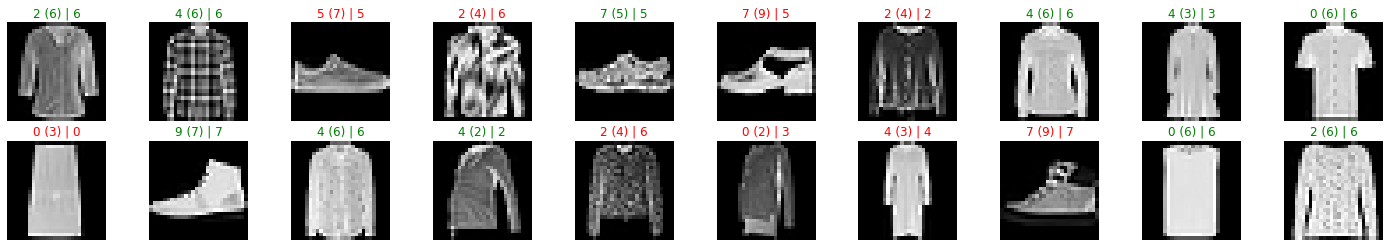

In [ ]:
# CELL TO BE COMPLETED

plt.figure(figsize=(25, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.imshow(test_set_array[index[i],:,:], cmap='gray')
    plt.title("{} ({}) | {}".format(str(np.int(preds_1[index[i]])), str(np.int(targets[index[i]])), str(np.int(preds_3[index[i]]))), color=("green" if preds_3[index[i]]==targets[index[i]] else "red"))
plt.show()


## 5- Challenge <a class="anchor" id="section_5"></a>

#### **Question 5.1** - What is your best overall test accuracy and with which methodology? The first 3 teams will obtain bonus points! <a class="anchor" id="question_5_1"></a>